In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
#sns.set_style("whitegrid", {'xtick.bottom': True , 'ytick.left': True})
#sns.set_style("ticks")


In [2]:
df = pd.read_csv("master_study/final.csv")
df

,Unnamed: 0,start_tracking_at_element,q0,mass0,p0c,gamma0,beta0,s,x,y,...,rvv,rpp,path 1,name 1,path 2,name 2,q1,q2,normalized amplitude in xy-plane,angle in xy-plane [deg]
0,0,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,0.000000,0.000289,0.000226,...,1.0,0.999942,/home/cdroin/example_DA_study/master_study/HL_...,madx_000,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_000,62.305,60.305,2.00000,15.0
1,1,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,0.000000,-0.000007,-0.000305,...,1.0,0.999942,/home/cdroin/example_DA_study/master_study/HL_...,madx_000,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_000,62.305,60.305,2.00000,30.0
2,2,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,0.000000,0.000088,-0.000435,...,1.0,0.999942,/home/cdroin/example_DA_study/master_study/HL_...,madx_000,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_000,62.305,60.305,2.00000,45.0
3,3,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,0.000000,0.000181,0.000352,...,1.0,0.999938,/home/cdroin/example_DA_study/master_study/HL_...,madx_000,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_000,62.305,60.305,2.00000,60.0
4,4,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,0.000000,-0.000040,0.000045,...,1.0,0.999937,/home/cdroin/example_DA_study/master_study/HL_...,madx_000,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_000,62.305,60.305,2.00000,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,81,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,8834.024657,0.719121,-1.468715,...,1.0,1.000154,/home/cdroin/example_DA_study/master_study/HL_...,madx_008,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_004,62.325,60.325,4.18750,30.0
3866,82,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,11738.418368,-0.958747,-2.092291,...,1.0,0.999856,/home/cdroin/example_DA_study/master_study/HL_...,madx_008,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_004,62.325,60.325,4.34375,45.0
3867,83,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,5249.621985,-0.719925,-1.160198,...,1.0,0.999730,/home/cdroin/example_DA_study/master_study/HL_...,madx_008,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_004,62.325,60.325,4.62500,45.0
3868,84,-1,1.0,9.382721e+08,7.000000e+12,7460.522474,1.0,24602.554561,1.315573,-0.663122,...,1.0,1.000249,/home/cdroin/example_DA_study/master_study/HL_...,madx_008,/home/cdroin/example_DA_study/master_study/HL_...,xsuite_004,62.325,60.325,4.25000,30.0


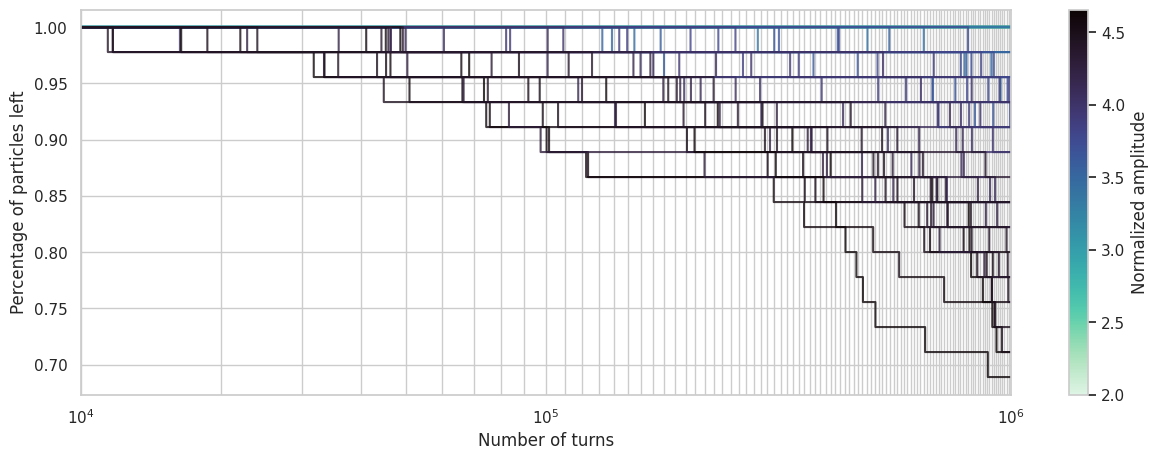

In [7]:
# Get the dataframe for the set of tunes q1=62.305 and q2=60.305
df_305 = df#df.query("q1 == 62.305 and q2 == 60.305")
n_turns = df['at_turn'].max()

# Make a colormap for amplitudes
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)#plt.get_cmap('viridis')
#colors = [cmap(i) for i in np.linspace(0, 1, len(df_305["normalized amplitude in xy-plane"].unique()))]

norm = plt.Normalize(df_305["normalized amplitude in xy-plane"].min(), df_305["normalized amplitude in xy-plane"].max())
sm = plt.cm.ScalarMappable(cmap="mako_r", norm=norm)
sm.set_array([])



# Make the plot wide
fig, ax = plt.subplots(figsize=(15,5))

for i, amplitude in enumerate(df_305["normalized amplitude in xy-plane"].unique()):
    df_per_amplitude = df_305[df_305["normalized amplitude in xy-plane"] == amplitude][['at_turn', 'normalized amplitude in xy-plane', 'q1', 'q2']]
    # sort by at_turn
    df_per_amplitude = df_per_amplitude.sort_values(by=['at_turn'])
    # get the percentage of particles left
    l_survived = [len(df_per_amplitude)]
    l_n_turns = [1]
    for idx, row in df_per_amplitude.iterrows():
        if row['at_turn'] == n_turns:
            l_survived.append(l_survived[-1])
            l_n_turns.append(n_turns)
        else:
            # To prevent linearization
            l_survived.append(l_survived[-1])
            l_n_turns.append(row['at_turn']-1)
            l_survived.append(l_survived[-1]-1)
            l_n_turns.append(row['at_turn'])

        
    plt.plot(l_n_turns, np.array(l_survived)/len(df_per_amplitude), label=f"amplitude = {amplitude}", color=sm.to_rgba(amplitude), alpha = 0.8)

import matplotlib.ticker as ticker
def func(x, pos): 
    if x==0:
        return '0'
    else:
        if np.log10(x)%1 == 0 or np.log10(x)%1 == 0.5:
            return r'$10^{{{:.0f}}}$'.format(np.log10(x))
        else:
            return ''


plt.xlabel("Number of turns")
plt.ylabel("Percentage of particles left")
ax.set_xscale('log')
plt.xlim(10**4, n_turns)
#plt.semilogx(base=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
#ax.xaxis.set_major_locator(ticker.LogLocator(subs = 'all'))

ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func))

cbar = plt.colorbar(sm, ax = ax)
cbar.set_label("Normalized amplitude")
#cbar.set_alpha(0.8)
#cbar.draw_all()
plt.savefig('surviving_particles.pdf') 
plt.show()
